# Here an example how to use simple feature of the GPC analysis package

This package allow you to 
* plot the evolution of the molar mass distribution according to logM
* calculate the diffferent molar mass, number average Mn, weight average Mw, the polydispersity PDI and the molar mass of the peak M_max
* possible to plot Mn and Mw with either scatter (one 1 experiment per point) or boxplot (one multiple experiment per point)


## Necessary package

First, we will need matplotlib to modify the plot generated by the plotting function, the package os is used here to take the data stored in the excel file in example_data

In [1]:
from GPC_analysis.class_GPC import GPC_dataset
from matplotlib import pyplot as plt
import os

## Necessary input data

This package requires two dictionnaries :
* one describing the conditions used for the analysed sample. One key required is "Experiment". Other parameters are optional and can be whatever suit your parameters
* one describing where to find each sample that you want to analyse

In [2]:
# Define sample information - 'Experiment' key is REQUIRED
exemple_file = {
    'Reference': {
        'Experiment': 'Reference',
        'Polymer used': 'P1.022',
        'Milling Time (s)': 0
    }
}

# Define file path - must point to the .xlsx FILE, not a folder
# Use os.path.join for cross-platform compatibility
filepath = {
    'Reference': os.path.join(os.getcwd(), 'example_data', 'P1.022-17072025.xlsx')
}

## Importing the class

There are 2 report type.
* 'raw' is the default one and use the "Export" report in the GPC software. This method allow an identical treatment to all analysed files 

** This will extract the raw concentration and elution time. Then, the calibration plot and Mark-Houwing parameters will be used to have the evolution of the value of molar mass of the analysed sample. 

** The baseline correction is by defaut using this range of elution volume [10, 31] ml. The noise is removed by changing to NaN all values under the maximum value of the noise between 10 and 14 ml. Then, the largest non NaN is kept -- the data.

** Integration range is by defaut using this range of elution volume [14, 26] ml

** baseline correction and integration ranges can be changed when calling GPC_dataset using int_x_range=[.., ..], baseline_window = [.., ..],

* 'excel': this will take the calculated MMD, logM and Mn, Mw of the software. Require a change in baseline and integration range in the software beforehand

In [3]:
gpc = GPC_dataset(
    filepath_dict= filepath,
    sample_information=exemple_file,
    # palette = None, # if None, will generate a palette of colors for the plot. If needed, indicate a dictionary - Example: {'Sample1': 'red', 'Sample2': 'blue'}
    # int_range = [14, 26], # ml, elution volume # Defaut integration range. unmute change the values if needed
    # baseline_windows = [10,31], # ml, elution volume # Defaut baseline windows. unmute change the values if needed
    report_type='raw',
    # polymer = PP # defaut polymer and currently the only one
    )

0.019326819623998036


## Plotting the raw data

One option is to plot the raw data with lines that indicates the range of integration and the baseline windows. This is useful at first to adjust the values based on the GPC data

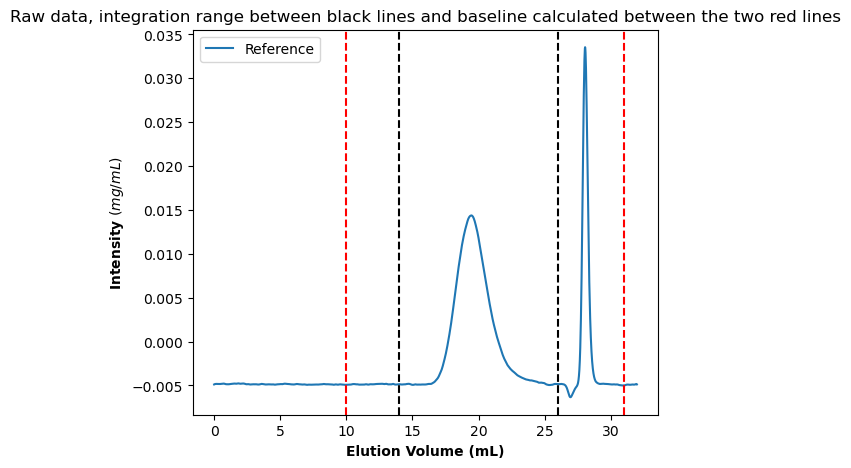

In [4]:
gpc.plotting_raw_data()
plt.show()

## Plotting the evolution of the Molar Mass Distribution in fonction of the Molar Mass Mw

The function plotting_MMD_Mw return a fig and an ax. 
ax variable can be used to personnalize the plot 
fig variable can be used to save the plotted generated

The label is custumable up to 3 differents labels indicated as label1, label2 and label3. 

By defaut, the code use the function \it{calculate_MMD_from_raw_data()} to generate the MMD vs Mw.

x axis can be in 'log' scale or 'linear'


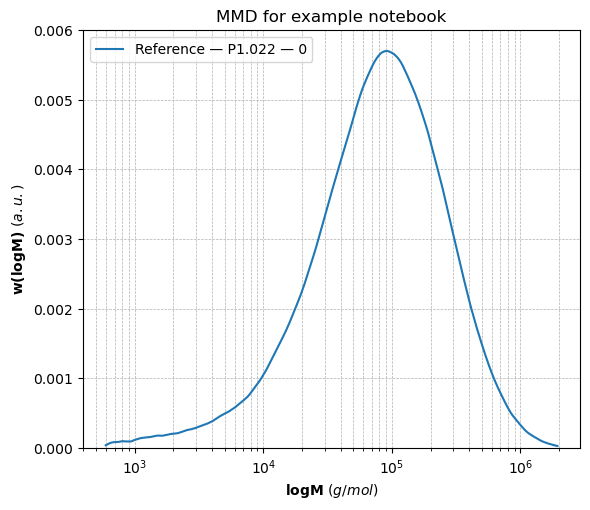

In [5]:
fig, ax = gpc.plotting_MMD_Mw(scale = 'log', label1 = 'Experiment', label2 = 'Polymer used', label3 = "Milling Time (s)")

ax.set_title('MMD for example notebook')
ax.set_ylim(0, 0.006)

fig.savefig('MMD_example_notebook.svg', dpi=300)

calculate_Mn_Mw_raw_data() is used if report type = 'raw'

This will return a DataFrame with the index the information stored in 'Experiment' and 4 columns: Mn, Mw, PDI, M_max

In [6]:
print(gpc.data_raw_corrected)

{'Reference':                      Concentration mg/mL      LogM
Elution Volume (mL)                               
16.41176                        0.000115  6.287937
16.42842                        0.000124  6.280435
16.44508                        0.000135  6.272937
16.46174                        0.000149  6.265442
16.47840                        0.000163  6.257949
...                                  ...       ...
25.02585                        0.000191  2.799295
25.04251                        0.000174  2.793234
25.05917                        0.000157  2.787176
25.07583                        0.000138  2.781119
25.09250                        0.000121  2.775062

[522 rows x 2 columns]}


In [7]:
data_Mn_Mw = gpc.calculate_Mn_Mw_raw_data()
print("Calculated Mn, Mw, PDI, M_max:", data_Mn_Mw)
print(f"Mn: {data_Mn_Mw['Mn[g/mol]']['Reference']:.2f} g/mol")
print(f"Mw: {data_Mn_Mw['Mw[g/mol]']['Reference']:.2f} g/mol")
print(f"PDI: {data_Mn_Mw['PDI']['Reference']:.2f}")
print(f"M_max: {data_Mn_Mw['M_max[g/mol]']['Reference']:.2f} g/mol")

0.019326819623998036
Calculated Mn, Mw, PDI, M_max:                Mw[g/mol]     Mn[g/mol]       PDI  M_max[g/mol]
Reference  139256.989902  28176.234179  4.942356  92609.001252
Mn: 28176.23 g/mol
Mw: 139256.99 g/mol
PDI: 4.94
M_max: 92609.00 g/mol


Possible to plot using scatter the data_Mn_Mw. In x axis, it is possible to have one of the information stored in the dictionnary exemple_file

0.019326819623998036


Text(0.5, 1.0, 'Mw for example notebook')

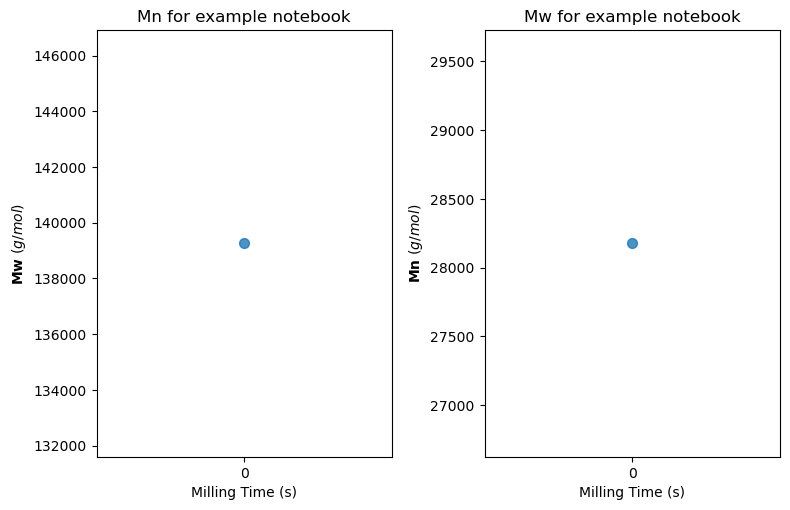

In [8]:
fig, ax1, ax2 = gpc.plotting_Mw_Mn_scatter(data_Mn_Mw,
                                           rotation=0,
                                           xlabel = 'Milling Time (s)',
                                           label=None)

ax1.set_xlabel('Milling Time (s)')
ax2.set_xlabel('Milling Time (s)')
ax1.set_title('Mn for example notebook')
ax2.set_title('Mw for example notebook')

If label is not None, then a legend is displayed using the information indicated 

0.019326819623998036


Text(0.5, 1.0, 'Mw for example notebook')

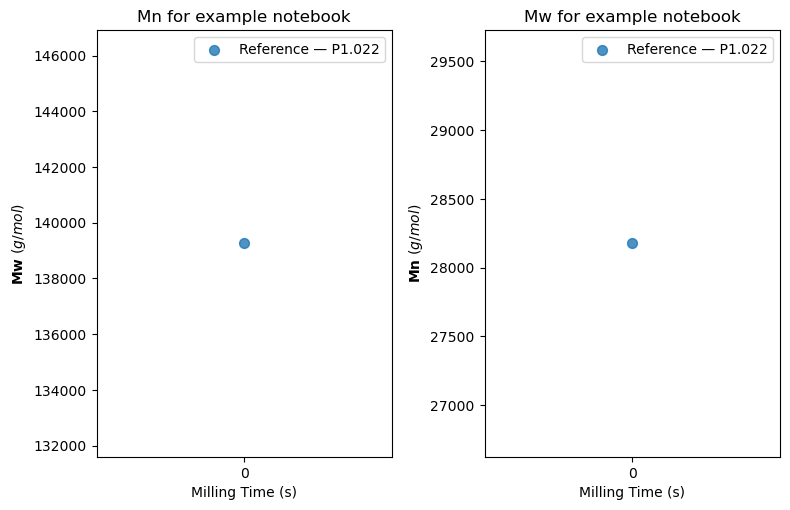

In [9]:
fig, ax1, ax2 = gpc.plotting_Mw_Mn_scatter(data_Mn_Mw,
                                           rotation=0,
                                           xlabel = 'Milling Time (s)',
                                           label = 'Polymer used')

ax1.set_xlabel('Milling Time (s)')
ax2.set_xlabel('Milling Time (s)')
ax1.set_title('Mn for example notebook')
ax2.set_title('Mw for example notebook')

Finally, the function save_results_to_csv allow saving in the indicated folder. If the folder do not exist, will create one. This will save as csv:
* the value stored in data_Mn_Mw
* the evolution of the molar mass distribution according to the molar mass
* the raw data with the baseline and noise correction + the converted logM

In [10]:
gpc.save_results_to_csv(filepath_saving = os.path.join(os.getcwd(), 'example_data', 'results'))

Results saved in c:\Users\Delar002\OneDrive - Universiteit Utrecht\Mechanochemistry\Experimental work\GPC\GPC_DDV418_raw Data\Raw Data\Laetitia\GPC_analysis\example_data\results
